In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
x_train = np.load("data/x_train_mix.npy")
y_train = np.load("data/y_train_mix.npy")
x_test = np.load("data/x_test_mix.npy")
y_test = np.load("data/y_test_mix.npy")

In [4]:
input_shape = x_train.shape[1:]
input_shape

(292, 608, 3)

In [5]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax'),
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 532608)            0         
                                                                 
 dense (Dense)               (None, 128)               68173952  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 68,174,597
Trainable params: 68,174,597
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist1 = model1.fit(
    x_train, 
    y_train,
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 8s 219ms/step - loss: 59882.4492 - accuracy: 0.2336 - val_loss: 16875.0215 - val_accuracy: 0.4920
Epoch 2/30
37/37 [==============================] - 8s 215ms/step - loss: 8369.0547 - accuracy: 0.3091 - val_loss: 2967.5664 - val_accuracy: 0.1820
Epoch 3/30
37/37 [==============================] - 8s 223ms/step - loss: 1130.6643 - accuracy: 0.5618 - val_loss: 590.5430 - val_accuracy: 0.5580
Epoch 4/30
37/37 [==============================] - 8s 219ms/step - loss: 1451.7761 - accuracy: 0.5355 - val_loss: 521.3890 - val_accuracy: 0.6220
Epoch 5/30
37/37 [==============================] - 8s 219ms/step - loss: 1799.7690 - accuracy: 0.5045 - val_loss: 4341.5684 - val_accuracy: 0.4960
Epoch 6/30
37/37 [==============================] - 8s 219ms/step - loss: 1919.0366 - accuracy: 0.4600 - val_loss: 1.6060 - val_accuracy: 0.1820
Epoch 7/30
37/37 [==============================] - 8s 217ms/step - loss: 1.6095 - accuracy: 0.1982 - val_loss: 1.6

In [7]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss ='SparseCategoricalCrossentropy', 
    metrics=['accuracy'])

In [8]:
hist2 = model2.fit(
    x_train, 
    y_train,    
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 101s 3s/step - loss: 23195.2695 - accuracy: 0.2945 - val_loss: 31.8118 - val_accuracy: 0.8480
Epoch 2/30
37/37 [==============================] - 100s 3s/step - loss: 38.9594 - accuracy: 0.8073 - val_loss: 33.3146 - val_accuracy: 0.8200
Epoch 3/30
37/37 [==============================] - 101s 3s/step - loss: 9.1954 - accuracy: 0.9136 - val_loss: 16.4861 - val_accuracy: 0.8960
Epoch 4/30
37/37 [==============================] - 100s 3s/step - loss: 4.6989 - accuracy: 0.9464 - val_loss: 23.9237 - val_accuracy: 0.8320
Epoch 5/30
37/37 [==============================] - 100s 3s/step - loss: 1.5179 - accuracy: 0.9736 - val_loss: 12.0965 - val_accuracy: 0.9080
Epoch 6/30
37/37 [==============================] - 101s 3s/step - loss: 1.3469 - accuracy: 0.9782 - val_loss: 9.6018 - val_accuracy: 0.9220
Epoch 7/30
37/37 [==============================] - 100s 3s/step - loss: 2.0249 - accuracy: 0.9636 - val_loss: 36.4758 - val_accuracy: 0.7360
Ep

In [12]:
model2.save("saved_models_mix/model2")
with open('saved_models_mix/history2.json', 'w') as handle: # saving the history of the model
    json.dump(hist2.history, handle)





    

INFO:tensorflow:Assets written to: saved_models_mix/model2\assets


INFO:tensorflow:Assets written to: saved_models_mix/model2\assets


Transfer Learning

In [9]:
model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
model.trainable = False

# adding the top classification layer
model_tl = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=5, activation='softmax')
    ]
)
model_tl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 10, 19, 1280)     2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 243200)            0         
                                                                 
 dense_4 (Dense)             (None, 5)                 1216005   
                                                                 
Total params: 3,473,989
Trainable params: 1,216,005
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model_tl.compile(optimizer="adam",
                 loss='SparseCategoricalCrossentropy',
                 metrics=['accuracy'])
hist_tl = model_tl.fit(
    x_train, 
    y_train, 
    epochs=30, 
    batch_size=30, 
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 65s 2s/step - loss: 14.5471 - accuracy: 0.5145 - val_loss: 2.8692 - val_accuracy: 0.7300
Epoch 2/30
37/37 [==============================] - 63s 2s/step - loss: 3.1793 - accuracy: 0.7627 - val_loss: 2.1290 - val_accuracy: 0.8780
Epoch 3/30
37/37 [==============================] - 63s 2s/step - loss: 1.3912 - accuracy: 0.8518 - val_loss: 2.4161 - val_accuracy: 0.7580
Epoch 4/30
37/37 [==============================] - 63s 2s/step - loss: 0.5006 - accuracy: 0.9091 - val_loss: 1.7272 - val_accuracy: 0.8020
Epoch 5/30
37/37 [==============================] - 63s 2s/step - loss: 0.2573 - accuracy: 0.9400 - val_loss: 1.5373 - val_accuracy: 0.8280
Epoch 6/30
37/37 [==============================] - 63s 2s/step - loss: 0.2629 - accuracy: 0.9536 - val_loss: 1.6056 - val_accuracy: 0.8140
Epoch 7/30
37/37 [==============================] - 63s 2s/step - loss: 0.0462 - accuracy: 0.9827 - val_loss: 1.2855 - val_accuracy: 0.8380
Epoch 8/30
37/37 [=

In [11]:
model_tl.save("saved_models_mix/model_tl")
with open('saved_models_mix/history_tl.json', 'w') as handle: # saving the history of the model
    json.dump(hist_tl.history, handle)

INFO:tensorflow:Assets written to: saved_models_mix/model_tl\assets


INFO:tensorflow:Assets written to: saved_models_mix/model_tl\assets


### Visualizations

In [ ]:
hist_fe = json.load(open("history_fe.json", "r"))

In [ ]:
model_fe = tf.keras.models.load_model("saved_models/model_fe")

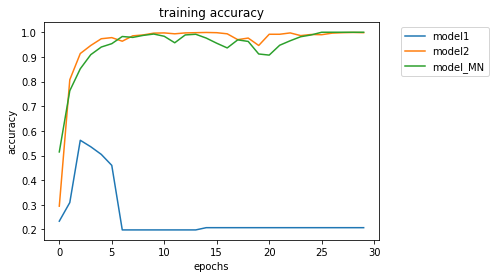

In [15]:
plt.plot(hist1.history["accuracy"], label="model1")
plt.plot(hist2.history["accuracy"], label="model2")
plt.plot(hist_tl.history["accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

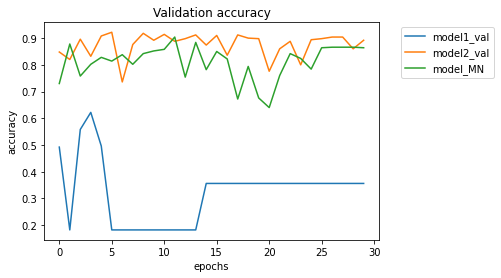

In [16]:
plt.plot(hist1.history["val_accuracy"], label="model1_val")
plt.plot(hist2.history["val_accuracy"], label="model2_val")
plt.plot(hist_tl.history["val_accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

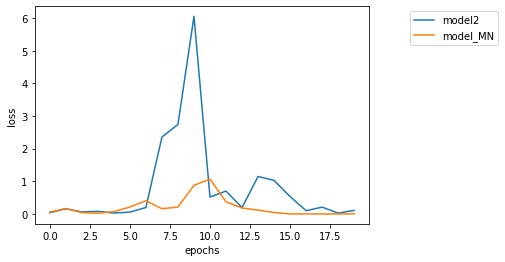

In [20]:
# plt.plot(hist1.history["loss"][10:], label="model1")
plt.plot(hist2.history["loss"][10:], label="model2")
plt.plot(hist_tl.history["loss"][10:],label="model_MN")

# plt.plot(hist1.history["val_loss"][10:], label="model1_val")
# plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"][10:], label="model_fe_val")
# plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

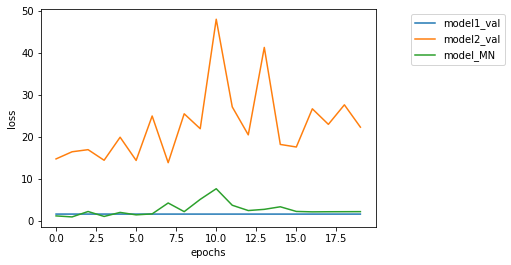

In [21]:
plt.plot(hist1.history["val_loss"][10:], label="model1_val")
plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"], label="model_fe_val")
plt.plot(hist_tl.history["val_loss"][10:],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Evaluate accuracy with test set

In [23]:
loss1, acc1 = model1.evaluate(x_test, y_test)
loss2, acc2 = model2.evaluate(x_test, y_test)
# loss_fe, acc_fe = model_fe.evaluate(x_test, y_test)
loss_tl, acc_tl = model_tl.evaluate(x_test, y_test)

16/16 [==============================] - 20s 1s/step - loss: 2.1872 - accuracy: 0.8640


In [26]:
pred = model2.predict(x_test)
labels = tf.argmax(pred, axis=1)
cm = tf.math.confusion_matrix(labels, y_test)

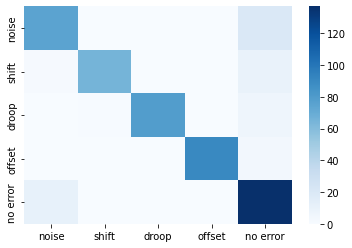

In [27]:
import seaborn as sns

l = ["noise", "shift", "droop", "offset", "no error"]
ax = sns.heatmap(cm, cmap="Blues")
ax.xaxis.set_ticklabels(l)
ax.yaxis.set_ticklabels(l)
plt.show()